# Notebook sobre machine learning aplicado al dataset de Titanic

## Uso de clasificadores!

In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv("E:/GsB/DataScience/RepoMio/DataScience/titanic/train.csv")
df_test = pd.read_csv("E:/GsB/DataScience/RepoMio/DataScience/titanic/test.csv")

In [3]:
print(df_train.shape)
print(df_test.shape)

(891, 12)
(418, 11)


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Acá elimino las características (columnas) que no me interesan

In [5]:
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp',\
                 'Parch']

In [6]:
df_train = df_train.drop(drop_elements, axis = 1)
df_test = df_test.drop(drop_elements, axis = 1)

Como voy a trabajar con la característica "Survived", solo me interesa el dataset df_train. A partir de ahora hago la separación 80/20 para posterior entrenamiento y cálculo de error de mis modelos de clasificación

In [7]:
from sklearn.model_selection import train_test_split

### 1. Pclass vs Survived

In [8]:
print(df_train["Pclass"].isna().sum())

0


In [9]:
print(df_train["Survived"].isna().sum())

0


In [10]:
print(df_train[["Pclass", "Survived"]].groupby(["Pclass"]).mean())

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


### 2. Sex

In [11]:
print(df_train[["Sex", "Survived"]].groupby(["Sex"]).mean())

        Survived
Sex             
female  0.742038
male    0.188908


## A partir de acá empiezo la transformación de los datos

In [12]:
def mapping_sex(df):
    df = df.map({"female": 0, "male": 1}).astype(int)
    return df

In [13]:
df_train["Sex"] = mapping_sex(df_train["Sex"])

In [14]:
df_test["Sex"] = mapping_sex(df_test["Sex"])

In [15]:
df_train.head(3)

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22.0,7.2500,S
1,1,1,0,38.0,71.2833,C
2,1,3,0,26.0,7.9250,S


In [106]:
df_train.dropna(subset=['Age'], inplace=True)
df_train.shape

(714, 6)

In [176]:
df_train.Fare.isnull().any()

False

## A partir de acá empiezo la aplicación de clasificadores

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

En primera instancia, se definirá un clasificador cuyo objetivo es predecir si sobrevivió o no un pasajero del titanic en función de su Pclass y Sex.

In [192]:
#X = df_train.drop(["Survived", "Age", "Fare", "Embarked"], axis=1)
X = df_train.drop(["Survived", "Embarked"], axis=1)
y = pd.DataFrame(data=df_train["Survived"])
y = np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#X_test = df_test.drop(["Survived", "Age", "Fare", "Embarked"], axis=1)

In [186]:
neigh = KNeighborsClassifier(n_neighbors=5)

In [155]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [156]:
y_pred = neigh.predict(X_test)

In [157]:
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [158]:
from sklearn.metrics import confusion_matrix

In [159]:
#confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
confusion_matrix(y_test, y_pred)

array([[115,  22],
       [ 42,  57]], dtype=int64)

In [193]:
from sklearn.model_selection import GridSearchCV
neigh = KNeighborsClassifier()
param_grid = [
    {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 10, 20], 'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
    'weights': ['uniform', 'distance']},
]
grid_search = GridSearchCV(neigh, param_grid, cv=10,scoring='neg_mean_squared_error', return_train_score=True)

In [197]:
grid_search.fit(X_train, y_train)

SyntaxError: invalid syntax (<ipython-input-197-c3d63442c1cd>, line 1)

In [189]:
grid_search.best_params_

{'algorithm': 'kd_tree', 'n_neighbors': 7, 'weights': 'distance'}

In [195]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [199]:
y_pred = grid_search.best_estimator_.predict_proba(X_test)
y_pred

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.71301005, 0.28698995],
       [0.66628179, 0.33371821],
       [0.62255851, 0.37744149],
       [0.52828439, 0.47171561],
       [0.26198936, 0.73801064],
       [0.28739836, 0.71260164],
       [0.36602514, 0.63397486],
       [0.        , 1.        ],
       [0.78603869, 0.21396131],
       [0.49478145, 0.50521855],
       [1.        , 0.        ],
       [0.77678054, 0.22321946],
       [0.25331827, 0.74668173],
       [0.48813178, 0.51186822],
       [0.74133103, 0.25866897],
       [0.87202679, 0.12797321],
       [0.21873051, 0.78126949],
       [0.22186198, 0.77813802],
       [0.49478538, 0.50521462],
       [1.        , 0.        ],
       [0.82692065, 0.17307935],
       [0.57037713, 0.42962287],
       [0.58290637, 0.41709363],
       [0.31060025, 0.68939975],
       [0.7856869 , 0.2143131 ],
       [1.

In [191]:
grid_search.cv_results_['mean_train_score']

array([-0.13574881, -0.08670327, -0.13273148, -0.08066107, -0.16387812,
       -0.07996502, -0.15132482, -0.07880168, -0.17992682, -0.07856912,
       -0.16457417, -0.07856912, -0.19177324, -0.07856912, -0.21548016,
       -0.07856912, -0.27104547, -0.07856912, -0.13574881, -0.08670327,
       -0.13389319, -0.08066107, -0.16620317, -0.07996502, -0.15434917,
       -0.07880168, -0.18108853, -0.07856912, -0.16782783, -0.07856912,
       -0.19363372, -0.07856912, -0.21385441, -0.07856912, -0.26755547,
       -0.07856912, -0.1403989 , -0.08577358, -0.12622362, -0.07856912,
       -0.16155901, -0.08066053, -0.14994027, -0.07856912, -0.18248927,
       -0.07856912, -0.17364666, -0.07856912, -0.19666077, -0.07856912,
       -0.20967216, -0.07856912, -0.26220122, -0.07856912, -0.13574881,
       -0.08670327, -0.13389319, -0.08066107, -0.16620317, -0.07996502,
       -0.15434917, -0.07880168, -0.18108853, -0.07856912, -0.16782783,
       -0.07856912, -0.19363372, -0.07856912, -0.21385441, -0.07

In [196]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.6649077923462318, 0.6694915254237288, 0.6611171552908841, None)

In [23]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

[[170   5]
 [ 62  58]]


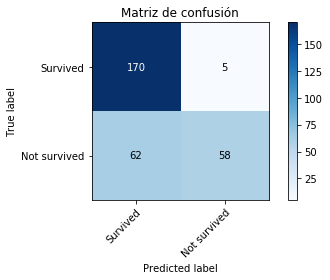

In [24]:
class_names = ["Survived", "Not survived"]
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Matriz de confusión')